In [1]:
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image
from IPython import display

In [2]:
def as_gif(images, path="temp.gif"):
  # Render the images as the gif (15Hz control frequency):
  images[0].save(path, save_all=True, append_images=images[1:], duration=int(1000/15), loop=0)
  gif_bytes = open(path,"rb").read()
  return gif_bytes

In [3]:
ds = tfds.load("droid_100", data_dir="/home/qwest/data_for_ml/", split="train")

2024-12-08 20:04:30.868787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733677470.881301 1848115 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733677470.884990 1848115 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-08 20:04:30.898755: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1733677475.390104 1848115 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 42

In [20]:
images_wrist_image_left = []
for episode in ds.shuffle(10, seed=0).take(10):
  for i, step in enumerate(episode["steps"]):
    images_wrist_image_left.append(
      Image.fromarray(
        #np.concatenate((
        #      step["observation"]["exterior_image_1_left"].numpy(),
        #      step["observation"]["exterior_image_2_left"].numpy(),
              step["observation"]["wrist_image_left"].numpy(),
        #), axis=1)
      )
    )

2024-12-08 20:17:51.398182: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
len(images_exterior_image_1_left)

2684

In [8]:
import matplotlib.pyplot as plt

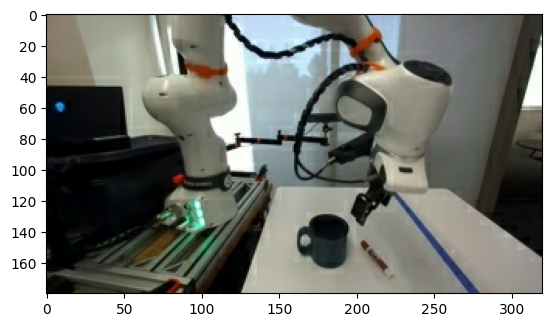

In [22]:
plt.imshow(images_exterior_image_2_left[2100])

In [2]:
from model import *
from data import Ego4d, DEVICE, BATCH_SIZE, transform1, transform2, ResumableRandomSampler

device cuda is ready


In [3]:
import cv2

In [4]:
model = VAE(32, batch_size=160).to(DEVICE)

In [5]:
from PIL import Image

In [13]:
data["front_cam_ob"].shape[0]

239

In [24]:
for i in range(0, data["mount_cam_ob"].shape[0], 3):
    im = Image.fromarray(data["mount_cam_ob"][i])
    im.save(f"/home/qwest/data_for_ml/JOCK/{i+238}.png")

In [6]:
from data import ROBO, StaticSampler, DataLoader

In [151]:
print('transform initializate sucsess')
train_dataset = ROBO(root_dir='/home/qwest/data_for_ml/DROID/7/',
                           transform1=transform1,
                           transform2=transform2)
print("train_dataset init")
sampler = StaticSampler(train_dataset)
#sampler.set_state(checkpoint['sampler_state'])
print("train_sampler init")
train_loader = DataLoader(dataset=train_dataset,
                           batch_size=160,
                           #shuffle=False,
                           sampler=sampler,)
print("train_loader init")

transform initializate sucsess
train_dataset init
train_sampler init
train_loader init


In [143]:
len(train_loader)

1

In [152]:
x = next(iter(train_loader))

In [153]:
x.shape

torch.Size([160, 3, 64, 64])

In [154]:
model.load_state_dict(torch.load('/home/qwest/project/PycharmProjects/Reinforsment_Learning/VAE/model.pt', weights_only=True))
model.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace=True)
    (7): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2), bias=False)
    (8): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): Conv2d(512, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 512, kernel_size=(4, 4), 

In [147]:
outputs = []

In [155]:
for i in range(len(train_loader)):
    x = next(iter(train_loader))
    Z = model.encode(x.to(DEVICE))
    outputs.append(Z[0])

In [156]:
result = torch.stack(outputs) 

In [157]:
result.shape

torch.Size([6, 160, 32, 4, 4])

In [99]:
import numpy as np

In [158]:
np.save('Z', result.detach().cpu().numpy())

In [101]:
a = model.decoder(result[0])

In [102]:
a.shape

torch.Size([160, 3, 64, 64])

In [106]:
img = a[10].detach().cpu().numpy().transpose(1, 2, 0)

In [107]:
img.shape

(64, 64, 3)

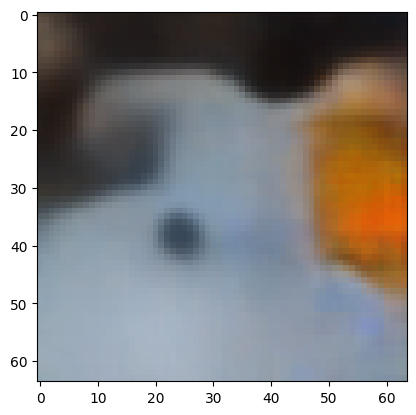

In [108]:
plt.imshow(img)